# Grey Wolf Optimizer (GWO) Algorithm Implementation

This module implements the Grey Wolf Optimizer algorithm for solving optimization problems.

## Classes

### GWOOptimizer
Implements the Grey Wolf Optimizer algorithm.

## Functions

### objective_function
A sample objective function.

## Usage
If run as a script, it will execute the GWO algorithm with default parameters and plot the convergence curve.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple

In [10]:
class GWOOptimizer:
    """
    Grey Wolf Optimizer (GWO) algorithm implementation.

    This class encapsulates the GWO algorithm, providing methods for initialization,
    optimization, and result retrieval.
    """

    def __init__(self, objective_function: Callable[[np.ndarray], float],
                 pop_size: int, max_iterations: int, dimensions: int,
                 lower_bound: float, upper_bound: float, seed: int = None):
        """
        Initialize the GWO optimizer.

        Args:
            objective_function (Callable): The function to be optimized.
            pop_size (int): Size of the wolf population.
            max_iterations (int): Maximum number of iterations.
            dimensions (int): Number of dimensions in the search space.
            lower_bound (float): Lower bound of the search space.
            upper_bound (float): Upper bound of the search space.
            seed (int, optional): Seed for random number generator. Defaults to None.
        """
        self.objective_function = objective_function
        self.pop_size = pop_size
        self.max_iterations = max_iterations
        self.dimensions = dimensions
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.rng = np.random.default_rng(seed)

        self.alpha_pos = np.zeros(dimensions)
        self.alpha_score = np.inf
        self.beta_pos = np.zeros(dimensions)
        self.beta_score = np.inf
        self.delta_pos = np.zeros(dimensions)
        self.delta_score = np.inf

        self.positions = self._initialize_positions()
        self.convergence_curve = np.zeros(max_iterations)

    def _initialize_positions(self) -> np.ndarray:
        """Initialize the positions of wolves randomly within the specified bounds.

        Returns:
            np.ndarray: Randomly initialized positions of wolves.
        """
        return self.rng.uniform(self.lower_bound, self.upper_bound,
                                size=(self.pop_size, self.dimensions))

    def optimize(self) -> Tuple[float, np.ndarray, np.ndarray]:
        """Perform the optimization process.

        Returns:
            Tuple[float, np.ndarray, np.ndarray]: Best score, best position,
            and convergence curve.
        """
        for iteration in range(self.max_iterations):
            self._update_wolf_pack()
            self._update_positions(iteration)
            self.convergence_curve[iteration] = self.alpha_score

        return self.alpha_score, self.alpha_pos, self.convergence_curve

    def _update_wolf_pack(self):
        """Update alpha, beta, and delta wolves based on their fitness."""
        for i in range(self.pop_size):
            # Clip positions to stay within bounds
            self.positions[i] = np.clip(self.positions[i], 
                                         self.lower_bound, 
                                         self.upper_bound)
            fitness = self.objective_function(self.positions[i])

            # Update alpha, beta, and delta wolves based on fitness
            if fitness < self.alpha_score:
                self.delta_score, self.beta_score, self.alpha_score = (
                    self.beta_score, 
                    self.alpha_score, 
                    fitness
                )
                self.delta_pos, self.beta_pos, self.alpha_pos = (
                    self.beta_pos.copy(), 
                    self.alpha_pos.copy(), 
                    self.positions[i].copy()
                )
            elif fitness < self.beta_score:
                self.delta_score, self.beta_score = (
                    self.beta_score, 
                    fitness
                )
                self.delta_pos, self.beta_pos = (
                    self.beta_pos.copy(), 
                    self.positions[i].copy()
                )
            elif fitness < self.delta_score:
                self.delta_score = fitness
                self.delta_pos = self.positions[i].copy()

    def _update_positions(self, iteration: int):
        """Update positions of all wolves based on the GWO algorithm.

        Args:
            iteration (int): Current iteration number.
        """
        a = 2 - 2 * (iteration / self.max_iterations)

        for i in range(self.pop_size):
            # Calculate new position for each wolf
            self.positions[i] = self._calculate_new_position(self.positions[i], a)

    def _calculate_new_position(self, current_pos: np.ndarray, a: float) -> np.ndarray:
        """Calculate the new position for a wolf.

        Args:
            current_pos (np.ndarray): Current position of the wolf.
            a (float): Coefficient influencing position update.

        Returns:
            np.ndarray: New position of the wolf.
        """
        A1, C1 = self._get_a_c_coefficients(a)
        X1 = (self.alpha_pos - A1 * 
               np.abs(C1 * self.alpha_pos - current_pos))

        A2, C2 = self._get_a_c_coefficients(a)
        X2 = (self.beta_pos - A2 * 
              np.abs(C2 * self.beta_pos - current_pos))

        A3, C3 = self._get_a_c_coefficients(a)
        X3 = (self.delta_pos - A3 * 
              np.abs(C3 * self.delta_pos - current_pos))

        return (X1 + X2 + X3) / 3

    def _get_a_c_coefficients(self, a: float) -> Tuple[float, float]:
        """Calculate A and C coefficients for position update.

        Args:
            a (float): Coefficient influencing position update.

        Returns:
            Tuple[float, float]: A and C coefficients.
        """
        r1, r2 = self.rng.random(2)
        A = 2 * a * r1 - a
        C = 2 * r2
        return A, C

In [11]:
def objective_function(x: np.ndarray) -> float:
    """Calculate the objective function value.

    This function computes the sum of squares of the input array.

    Args:
        x (np.ndarray): Input array for which the objective function is calculated.

    Returns:
        float: The sum of squares of the input array.
    """
    return np.sum(x**2)

In [12]:
# Hyperparameters
LOWER_BOUND = -100
UPPER_BOUND = 100
POPULATION_SIZE = 100
MAX_ITERATIONS = 100
DIMENSIONS = 30

In [13]:
# Initialize and run the optimizer
optimizer = GWOOptimizer(
    objective_function=objective_function,
    pop_size=POPULATION_SIZE,
    max_iterations=MAX_ITERATIONS,
    dimensions=DIMENSIONS,
    lower_bound=LOWER_BOUND,
    upper_bound=UPPER_BOUND,
)
best_score, best_position, convergence_curve = optimizer.optimize()

# Output results
print(f"Best fitness = {best_score}")
print(f"Best position = {best_position}")

Best fitness = 1.0468652892650507e-20
Best position = [ 2.87534217e-11 -1.63676717e-12 -5.91690841e-12 -1.32278651e-14
 -1.44030302e-12  1.83087895e-11  7.70001624e-12  2.52658656e-12
  2.60562650e-11 -2.98806208e-12 -6.87857994e-13 -2.27981692e-12
 -2.25192039e-13  4.74234155e-12 -1.41549870e-12 -4.64043566e-11
 -9.31531444e-13 -4.90193113e-13 -2.54327523e-13 -3.14270503e-12
  5.75704078e-11 -7.88450961e-13 -4.30415198e-11  5.70544716e-12
 -1.69694974e-11 -2.61015997e-11 -8.31186774e-12 -8.69869452e-12
 -1.58853442e-12 -1.45782951e-12]


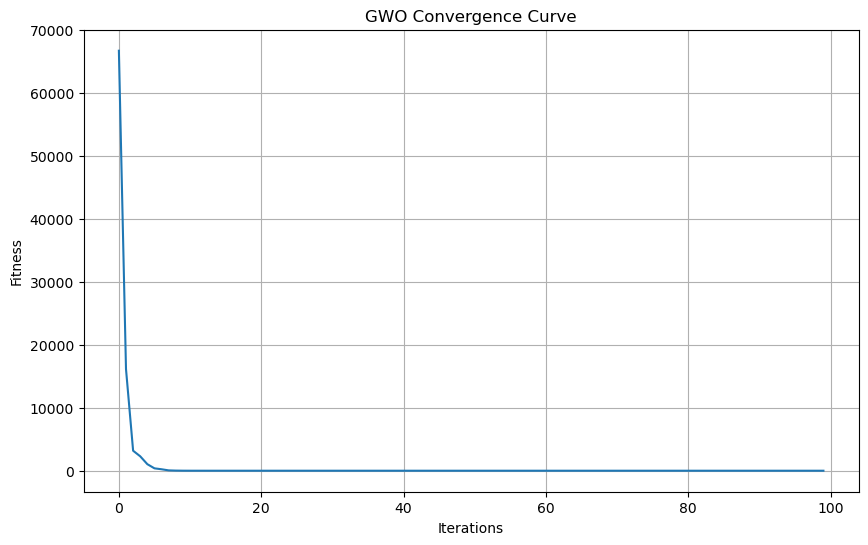

In [14]:
# Plot convergence curve
plt.figure(figsize=(10, 6))
plt.plot(convergence_curve)
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("GWO Convergence Curve")
plt.grid(True)
plt.show()